# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Importing the Dataset

In [2]:
# Reading our CSV file
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

## Dropping the index since we don't need it as a feature.

In [3]:
# Dropping the feature I don't need
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# EDA

## Checking the description and info of our data, and explaing the features we have.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Price ( \$326 - $18,823 ):**

 The cost of the diamond in US dollars.


--

**Carat (0.2 – 5.01):**

The weight of the diamond; higher values indicate larger stones.


--

**Cut (Fair, Good, Very Good, Premium, Ideal):**

 The quality of the diamond's cut, affecting its brilliance.


--

**Color (J – D):**

The whiteness of the diamond; J is the least white, while D is the most colorless.


--

**Clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):**

 The number and visibility of internal or external flaws; I1 has the most inclusions, IF is flawless.

--

**X (0 – 10.74 mm):**

The length of the diamond in millimeters.


--

**Y (0 – 58.9 mm):**

The width of the diamond in millimeters.


--

**Z (0 – 31.8 mm):**

The depth (height) of the diamond in millimeters.


--

**Depth:**

total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43% - 79%);

affects how light reflects inside.

--

**Table:**

width of top of diamond relative to widest point (43 - 95);

This is the size of the flat top part of the diamond compared to its widest point. A well-proportioned table helps the diamond reflect light better.

--

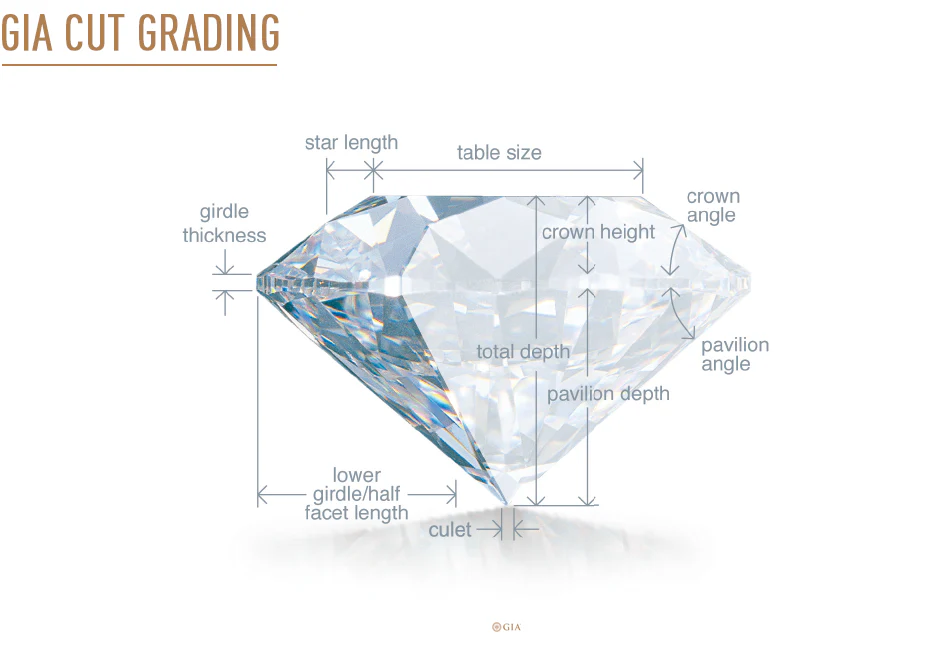


[Source](https://bashertjewelry.com/pages/diamonds-cut-grading)



## Checking for null values or duplicates in our dataset.

### Null values

In [5]:
# Checking for the total null values in each feature we have
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Duplicates

In [6]:
# Checking for duplicated rows in our dataset
print(df.duplicated().sum())

146


Since it detected some duplicated rows. We would need to drop them to ensure data integrity

In [7]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
print(f"The number of duplicated rows is: {df.duplicated().sum()}")
df.head()


The number of duplicated rows is: 0


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Checking for Outliers using **Interquartile Range (IQR) method**

**The IQR (Interquartile Range)** method helps detect outliers by using the spread of the middle 50% of your data.


---


2. **Q1 (25th percentile):**
The value below which 25% of the data lies.

3. **Q3 (75th percentile):**
The value below which 75% of the data lies.

4. **IQR:**
The difference between Q3 and Q1.
$$
   IQR = Q3 - Q1
   $$
---

### Outlier Detection:
- **Lower bound**:  
   $$
   \text{Lower bound} = Q1 - 1.5 \times IQR
   $$

- **Upper bound**:  
   $$
   \text{Upper bound} = Q3 + 1.5 \times IQR
   $$

Any value **below the lower bound** or **above the upper bound** is considered an **outlier**.


---


### Summary:
The IQR method identifies where the majority of data points lie and flags any values that fall too far outside this range as outliers.


In [8]:
df.describe()

carat         depth         table         price             x  \
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.79778     61.748080     57.458109   3933.065082      5.731214   
std        0.47339      1.429909      2.233679   3988.114460      1.120695   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    951.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000     62.500000     59.000000   5326.750000      6.540000   
max        5.01000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.734653      3.538714  
std        1.141209      0.705037  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

Since we got more than one feature that might contain some outliers, we would need to pass each of them through a loop to detect them.

--

Moreover, $(x,y,z)$ features have $(0)$ in their minimum values, which can't be true as that would make the diamond dimension-less.

In [9]:
# Loop through each numerical column and detect outliers
outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    # Calculate the quartiles and IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # If there are any outliers, append them to the outliers DataFrame
    if not col_outliers.empty:
        outliers = pd.concat([outliers, col_outliers])

# Show the outliers found
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8632 entries, 12246 to 51506
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    8632 non-null   float64
 1   cut      8632 non-null   object 
 2   color    8632 non-null   object 
 3   clarity  8632 non-null   object 
 4   depth    8632 non-null   float64
 5   table    8632 non-null   float64
 6   price    8632 non-null   int64  
 7   x        8632 non-null   float64
 8   y        8632 non-null   float64
 9   z        8632 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 741.8+ KB


We have many outliers as it is shown. However, I would like to visualize them before taking the choice whether I should remove them or not

## Data Visualization

<Figure size 1000x800 with 0 Axes>

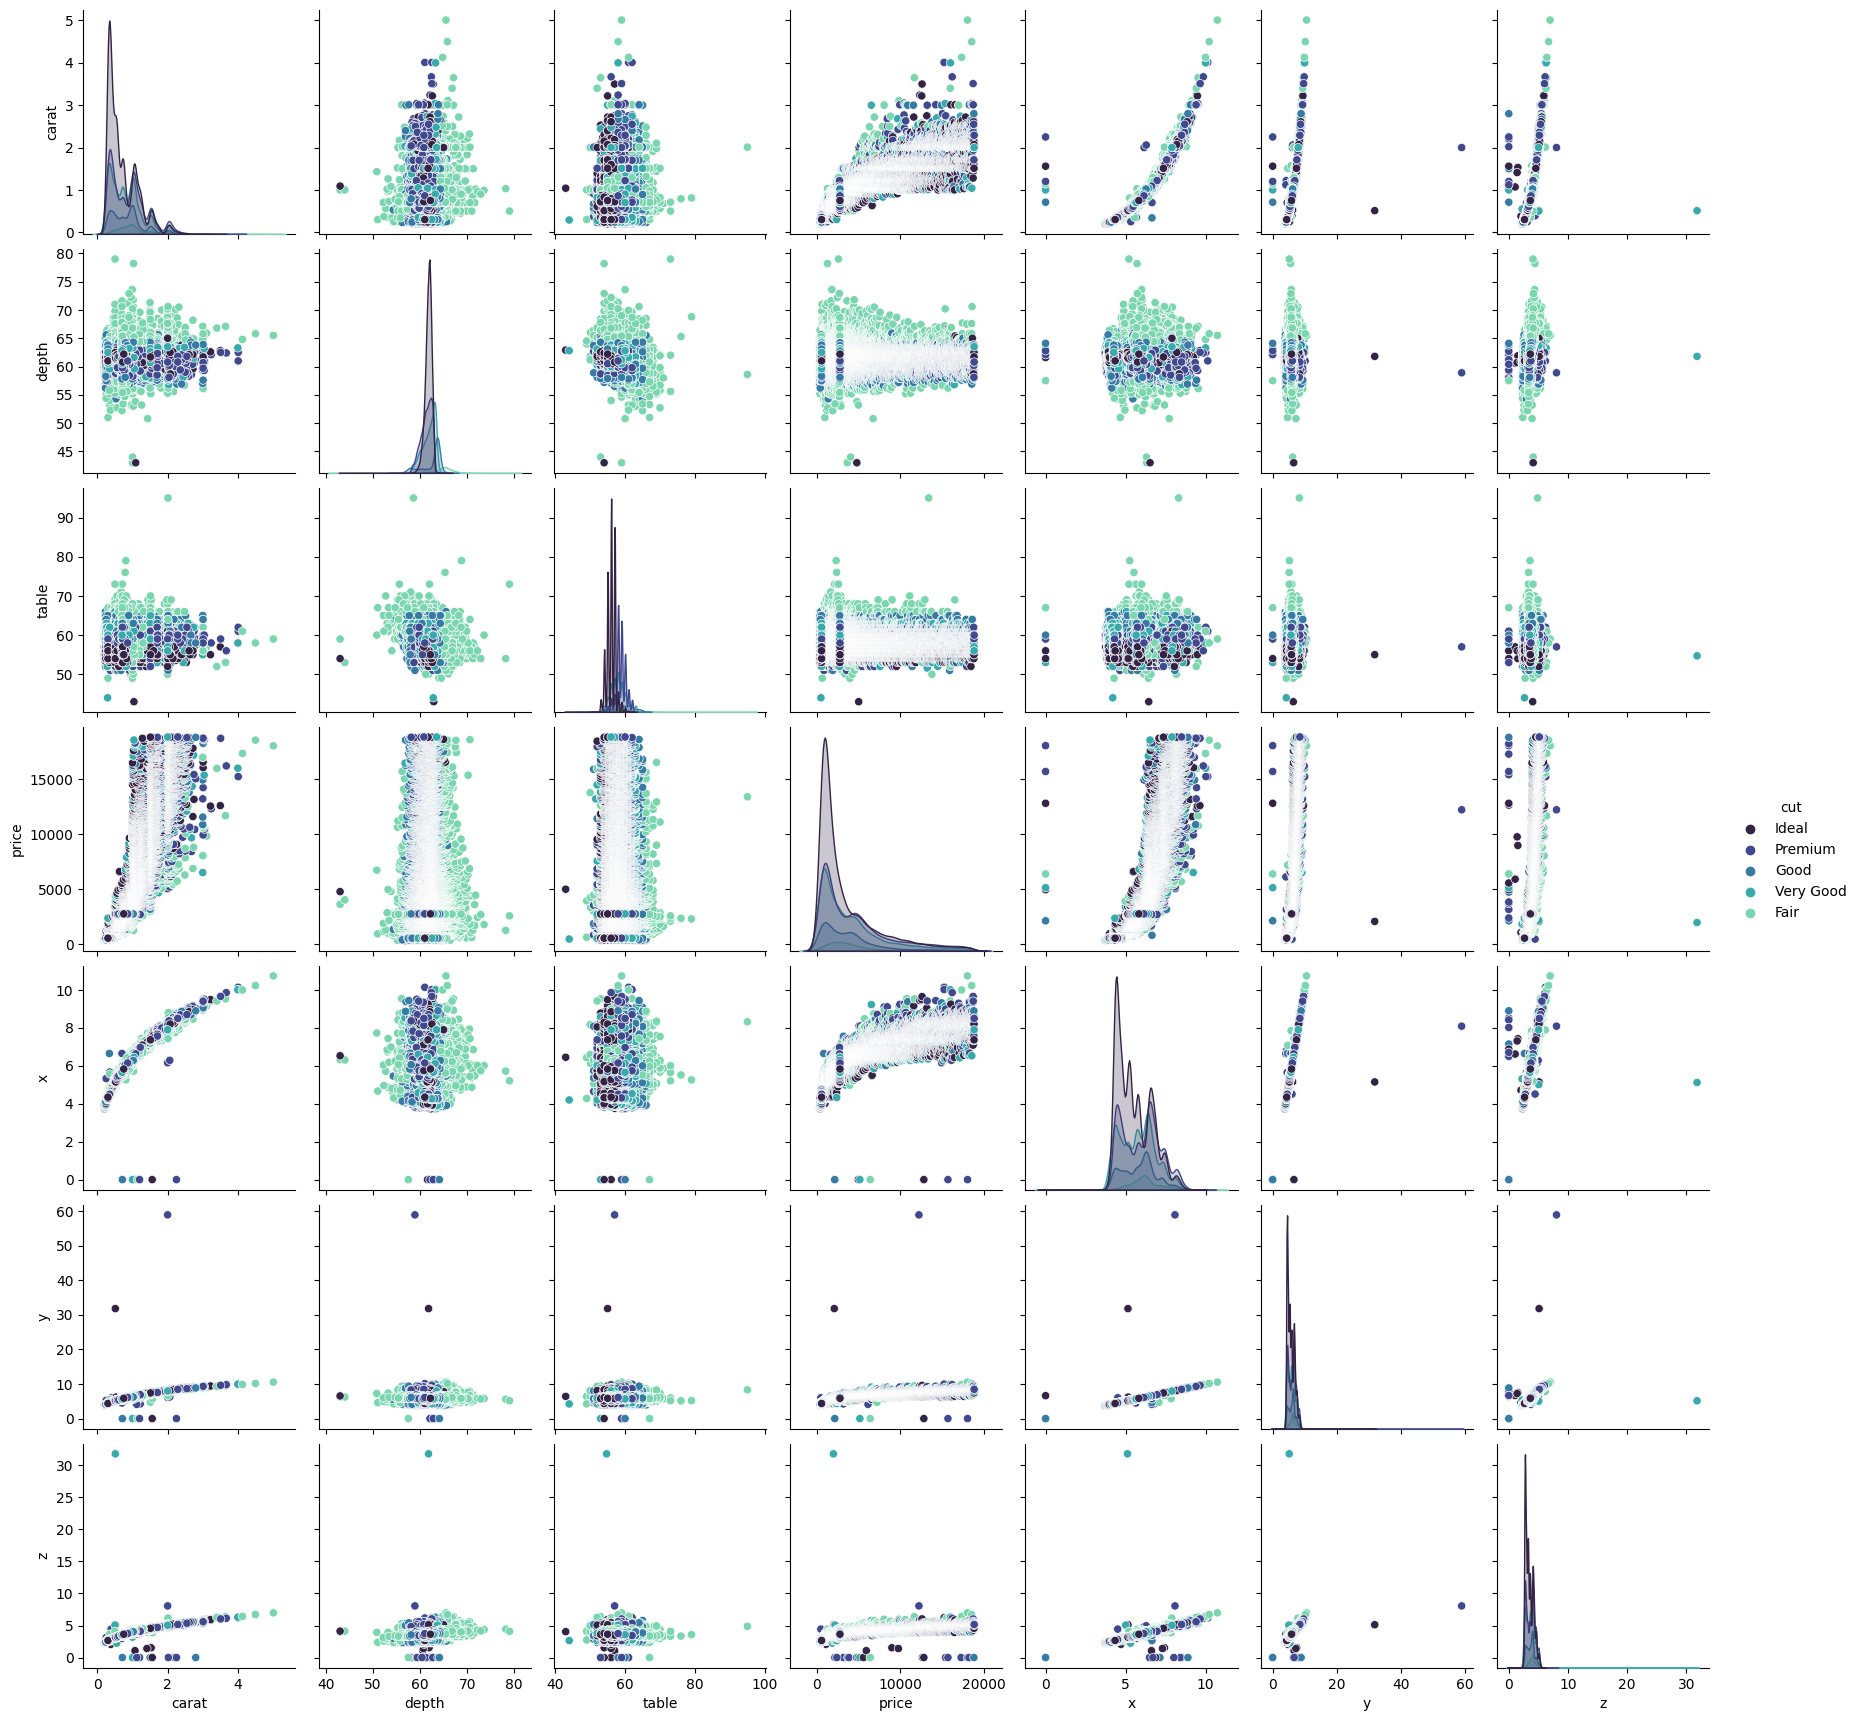

In [10]:
# Plotting a graph that visualizes the relationship between all numerical features in the dataset
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="cut", palette="mako")
plt.show()

As we can see from the different graphs we obtained. There are alot of outliers that can be identified and need to be cleaned in order to get the best fit line from out linear regression model.

## Removing outliers then visualizing again

In [11]:
# Dropping the outliers
df_cleaned = df.drop(outliers.index)

# Reseting the index
df_cleaned = df_cleaned.reset_index(drop=True)

# Gathering the info of out data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47416 entries, 0 to 47415
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47416 non-null  float64
 1   cut      47416 non-null  object 
 2   color    47416 non-null  object 
 3   clarity  47416 non-null  object 
 4   depth    47416 non-null  float64
 5   table    47416 non-null  float64
 6   price    47416 non-null  int64  
 7   x        47416 non-null  float64
 8   y        47416 non-null  float64
 9   z        47416 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


## Obtaining the description of the numerical features we have.

In [12]:
df_cleaned.describe()

carat         depth         table         price             x  \
count  47416.000000  47416.000000  47416.000000  47416.000000  47416.000000   
mean       0.708950     61.785908     57.261517   3112.258984      5.547416   
std        0.371023      1.106205      2.021723   2751.212081      0.979717   
min        0.200000     58.800000     52.000000    326.000000      3.730000   
25%        0.380000     61.100000     56.000000    891.000000      4.640000   
50%        0.600000     61.900000     57.000000   2064.000000      5.440000   
75%        1.010000     62.500000     59.000000   4637.000000      6.410000   
max        2.000000     64.700000     63.500000  11888.000000      8.280000   

                  y             z  
count  47416.000000  47416.000000  
mean       5.552283      3.428830  
std        0.973817      0.606057  
min        3.680000      1.410000  
25%        4.650000      2.860000  
50%        5.460000      3.360000  
75%        6.410000      3.980000  
max        8.270000      5.300000

As we can realize, The minimum number in $(x, y, z)$ isn't $(0)$ anymore. This indicates that our outliers removal was successful in terms of removing any dimension-less diamonds.

## Re-Visualizing without outliers

<Figure size 1000x800 with 0 Axes>

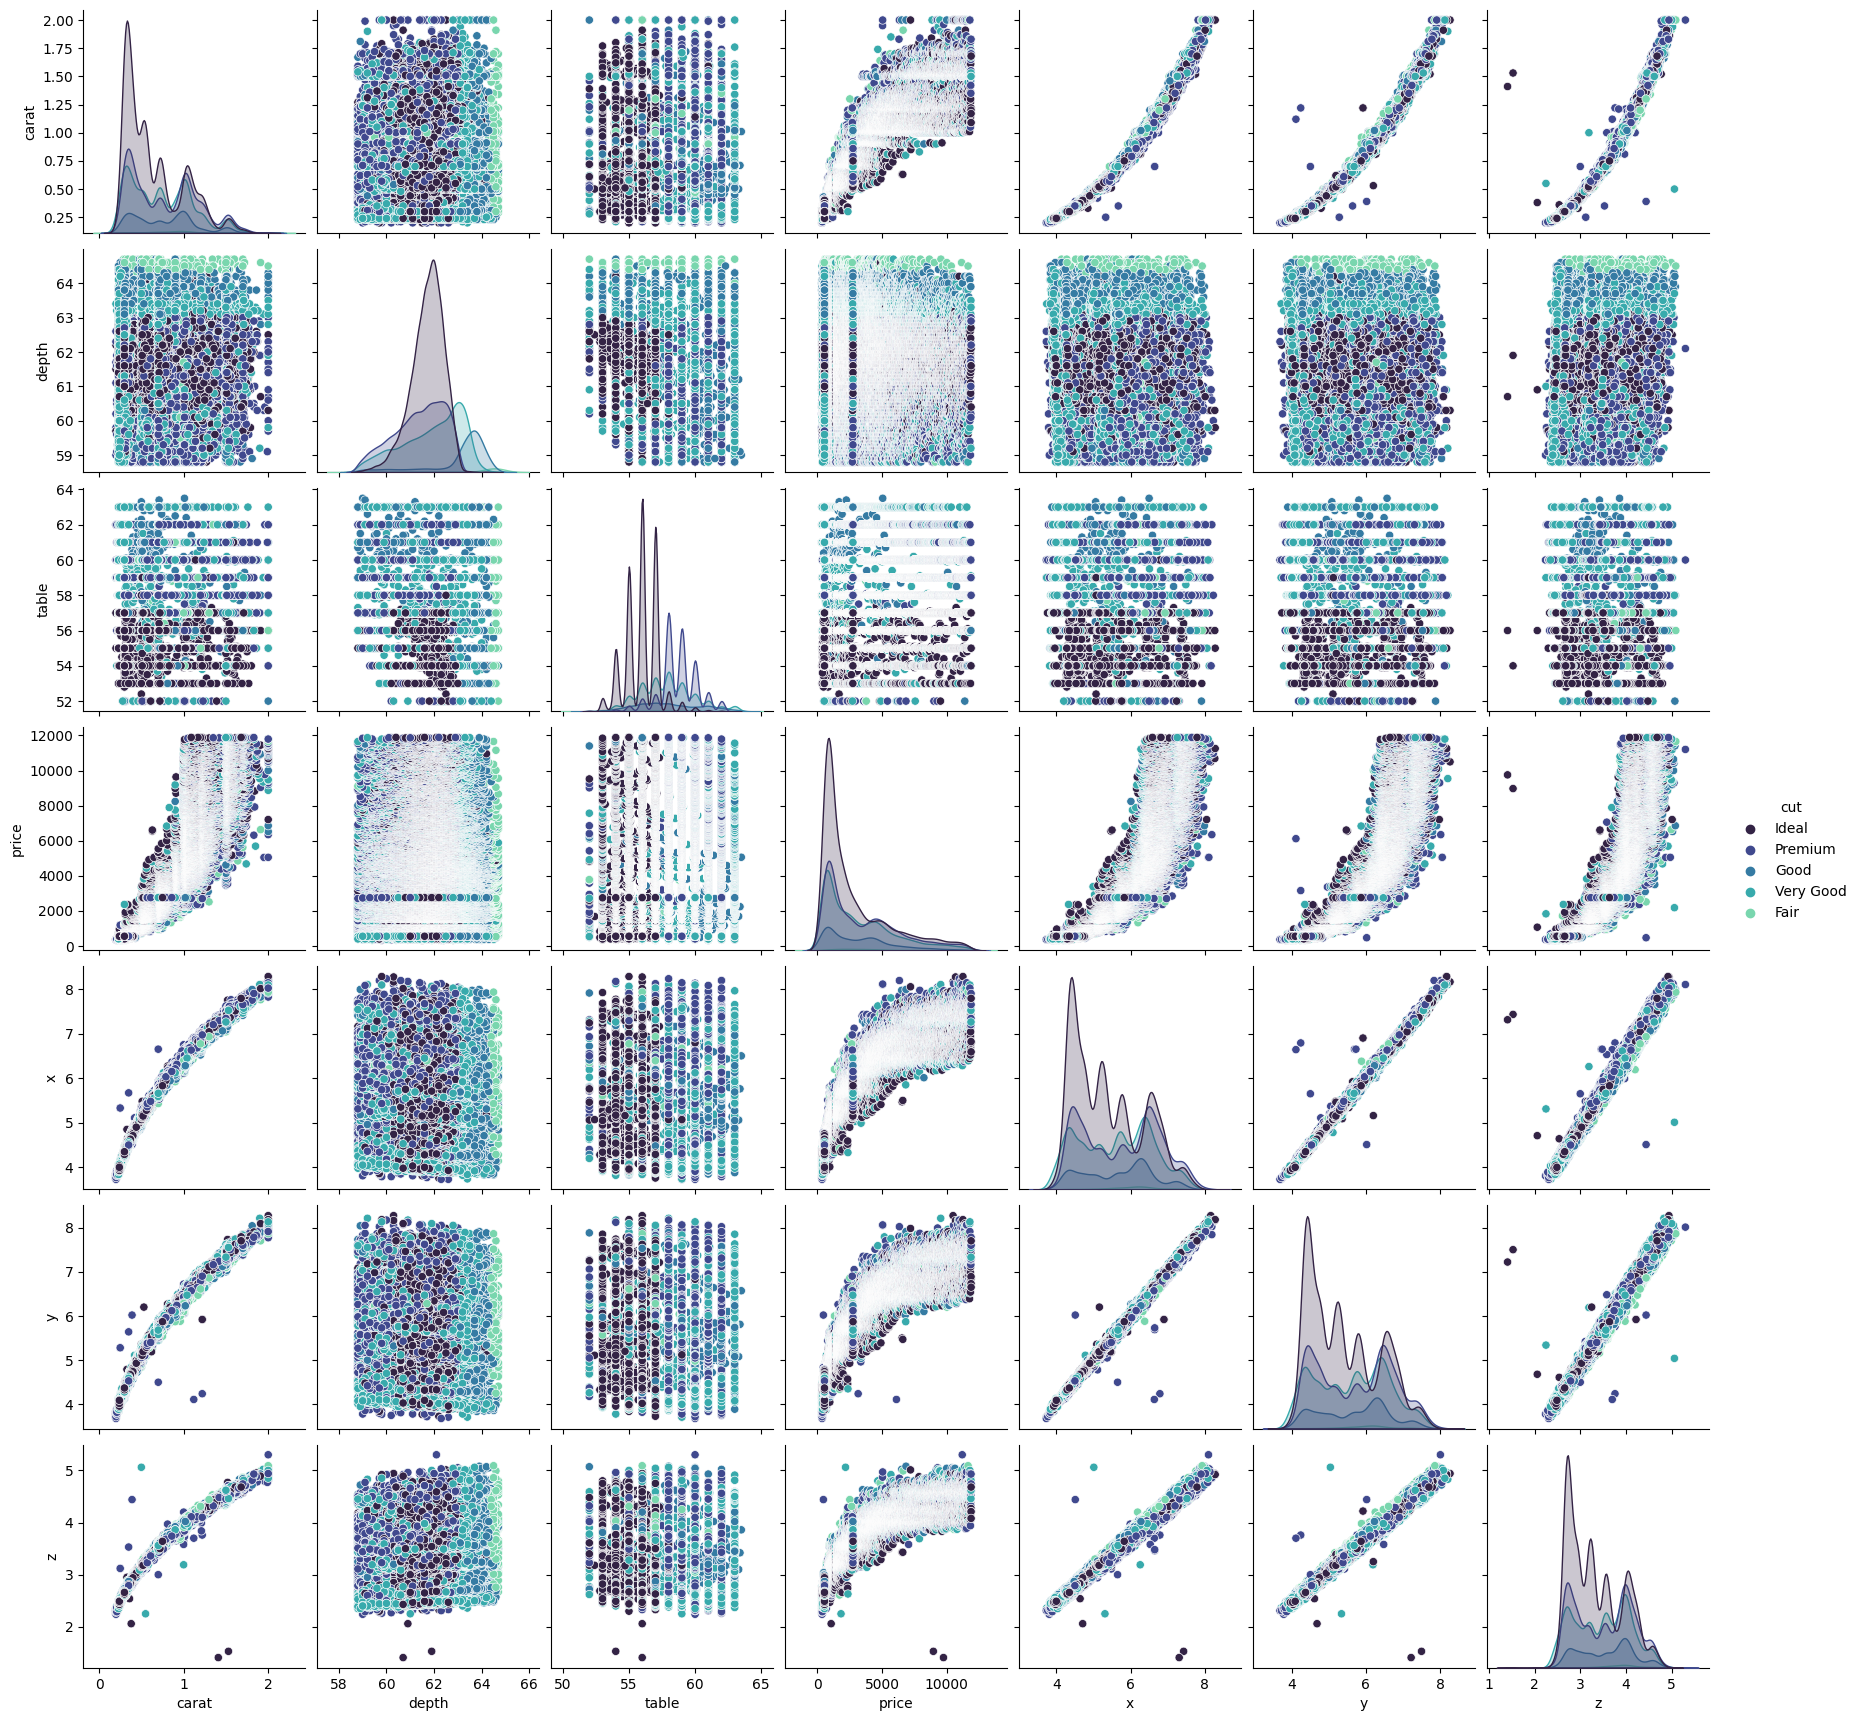

In [13]:
# Plotting a graph that visualizes the relationship between all numerical features in the dataset
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 8))
sns.pairplot(df_cleaned, hue="cut", palette="mako")
plt.show()

The distributions in the pairplot appear more centered, indicating that the extreme outliers beyond the lower and upper bounds have been successfully removed.



## Visualizing our categorical features.

In [14]:
# Identifying the columns with dtype (object)
categorical = df_cleaned.select_dtypes(include=['object']).columns

# Viewing the data we have extracted
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

We have found 3 categorical features. We will visualize them using violin plot as it can show us:

1. The summary of the data (like the median, range, and quartiles) just like a box plot.

2. The distribution shape (like where the data is crowded or spread out), which a box plot can't do.

It's super helpful when you want to compare multiple groups and see if they're skewed or have multiple peaks.

## Violin plot for categorical features

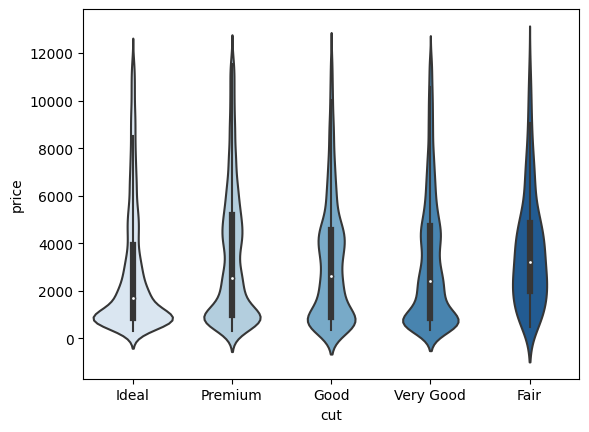

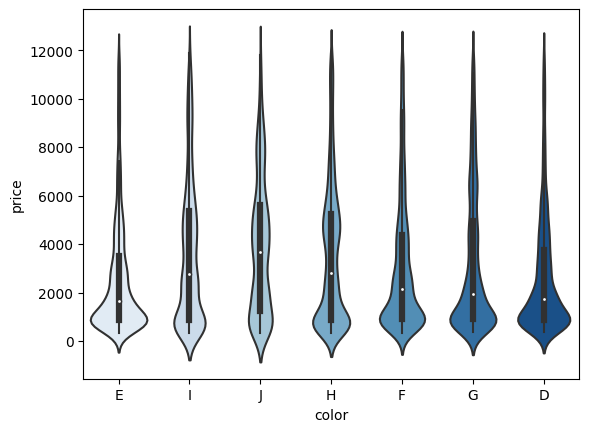

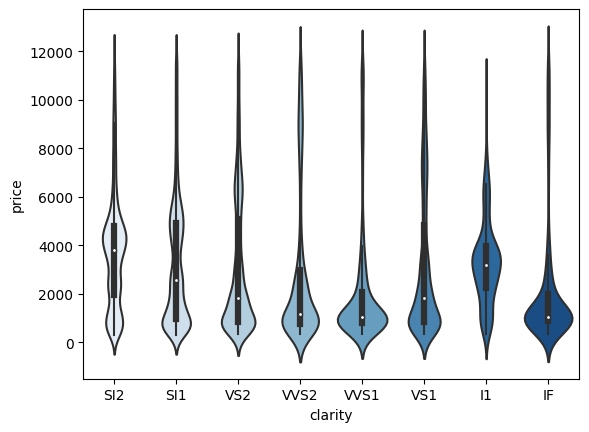

In [15]:
# Intiating a loop for the categorical features we have to plot the graphs
for i in categorical:
  sns.violinplot(data=df_cleaned, x= i, y='price', palette="Blues")
  plt.show()


## Violin plot interpertation process

**1.Box Plot Part**

* Median: The white dot in the center shows the middle value.

* Interquartile Range (IQR): The thick bar in the center represents the middle
50% of the data.

* Whiskers: Lines extending from the box show the range of the data, excluding outliers.

**2.Density Plot Part**
* Shape: The width of the plot at different values shows how much data is there.

* Wider sections mean more data points.

* Narrower sections mean fewer data points.

* Symmetry: If both sides are similar, the data is evenly distributed.

* Multiple Peaks: If there are multiple bulges, it indicates multiple groups within the data.

**3.Why Use a Violin Plot?**
* To see the distribution of the data.

* To compare multiple groups side by side.

* To identify skewness or multiple modes in the data.

# Data Preprocessing




## Encoding our categorical features Using the **appropriate** encoder.

## **Label Encoding**

assigns each unique category in a feature to a numerical value. For example, if we have a "Color" feature with categories ['Red', 'Green', 'Blue'], label encoding might assign: 'Red' → 0, 'Green' → 1, 'Blue' → 2.

### **Pros:**

Simple and quick to implement.

Doesn't increase the dimensionality of the dataset.

### **Cons:**

Imposes an arbitrary order on categories, which can mislead some algorithms into interpreting a false ordinal relationship. For instance, the model might think 'Red' < 'Green' < 'Blue', which isn't true for colors.


---



## **One-Hot Encoding**

creates a new binary feature for each unique category. Using the same "Color" example, it would generate three new features: 'Color_Red', 'Color_Green', and 'Color_Blue'. Each row has a '1' under the column of its respective color and '0' elsewhere.

### **Pros:**

Doesn't assume any ordinal relationship between categories.

Preferred for nominal data where no order exists among categories.

### **Cons:**

Can significantly increase dataset dimensionality if the categorical feature has many unique values, leading to the "curse of dimensionality."


---



## When to Use Each:

### **Label Encoding**

is suitable for ordinal data where the categories have a meaningful order (e.g., 'Low', 'Medium', 'High').

### **One-Hot Encoding**
is better for nominal data without an inherent order (e.g., 'Red', 'Green', 'Blue').

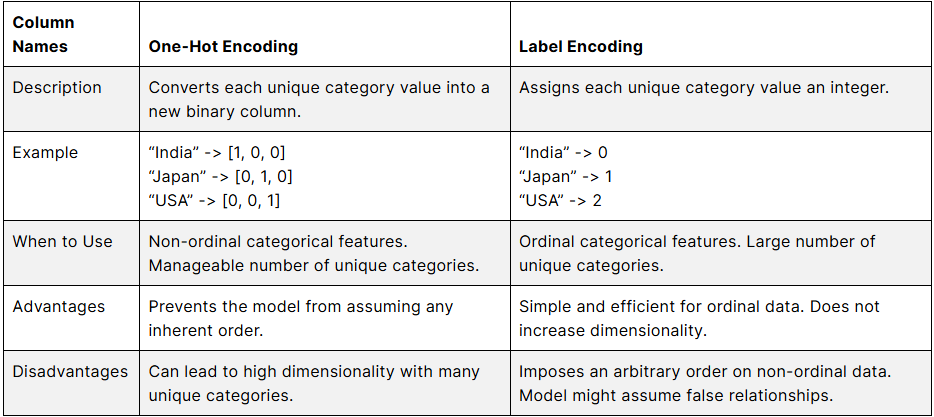

[For a more detailed explanation](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

I will use a label encoder as the features I have are **Ordinal Categorical Features**.

In [16]:
# Copying our data to prevent any change in our original cleaned data
label_df = df_cleaned.copy()

# Intiating the encoder
encoder = LabelEncoder()

# Encoding each categorical feature using a for loop
for col in categorical:
    label_df[col] = encoder.fit_transform(label_df[col])

# Previewing the data
label_df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
3   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
4   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48

## Reviewing the description of our DataFrame after encoding
This also makes us sure that all the features have a numerical dtype.

In [17]:
label_df.describe().T

count         mean          std     min     25%      50%      75%  \
carat    47416.0     0.708950     0.371023    0.20    0.38     0.60     1.01   
cut      47416.0     2.625337     0.947144    0.00    2.00     2.00     3.00   
color    47416.0     2.535769     1.683757    0.00    1.00     3.00     4.00   
clarity  47416.0     3.885756     1.730657    0.00    2.00     4.00     5.00   
depth    47416.0    61.785908     1.106205   58.80   61.10    61.90    62.50   
table    47416.0    57.261517     2.021723   52.00   56.00    57.00    59.00   
price    47416.0  3112.258984  2751.212081  326.00  891.00  2064.00  4637.00   
x        47416.0     5.547416     0.979717    3.73    4.64     5.44     6.41   
y        47416.0     5.552283     0.973817    3.68    4.65     5.46     6.41   
z        47416.0     3.428830     0.606057    1.41    2.86     3.36     3.98   

              max  
carat        2.00  
cut          4.00  
color        6.00  
clarity      7.00  
depth       64.70  
table       63.50  
price    11888.00  
x            8.28  
y            8.27  
z            5.30

## Correlation Matrix

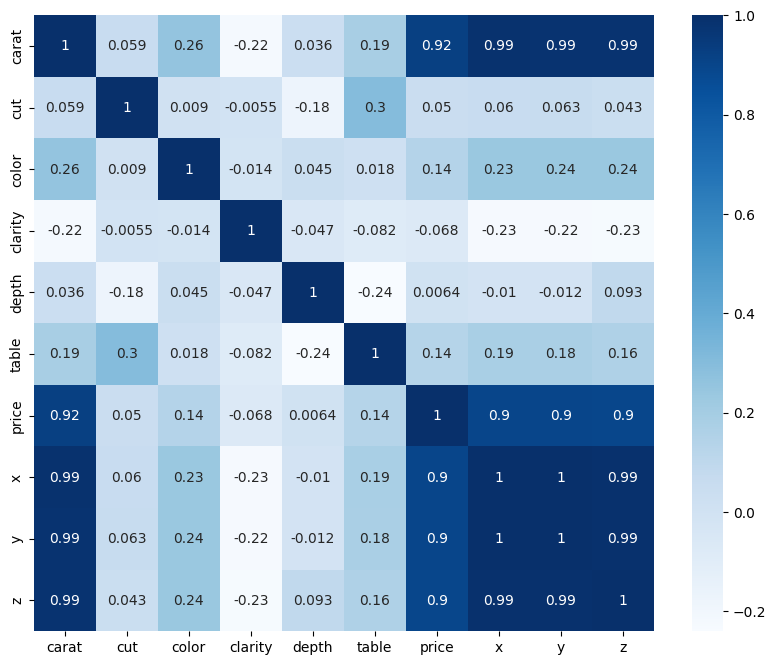

In [18]:
# Calculating the correlation between our features
corr = label_df.corr()

# Visualizing our Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

**1.Strong Positive Correlations (Close to 1)**
* carat, $ x, y, z $, and price are strongly positively correlated.

* More carats → bigger dimensions $(x, y, z)$ → higher price.


**2.Weak or No Correlation (Close to 0)**

* cut, color, clarity, and depth have weak correlation with price.

* This means they don't affect the price much (at least not linearly).

**3.Negative Correlation (Below 0)**

* depth and table have a slightly negative correlation with carat, clarity, etc.

* Not very strong but might slightly reduce the value as they increase.

We can use this info in our feature selection process as we can drop (cut, color and clarity) as they can influence our regression model in a negative way. However, we can try to see our model performance first without dropping them, then judge if we should drop them or not.

# Model Training (Using Linear Regression)

## Splitting the data using Train_Test_split function

In [19]:
# Dropping our Target feature and assigning it to a specified variable
X = label_df.drop('price', axis=1)
y = label_df['price']

In [20]:
# Splitting the data into train and test subsets with random selection to ensure that the model has passed through all the data we have
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling our data to make the model work more efficiently

### I will be Using Standard Scaler
### **What is StandardScaler?**

**StandardScaler** is a tool that standardizes your data.  
It shifts the data so that:

- The **mean (μ)** becomes `0`  
- The **standard deviation (σ)** becomes `1`

**Basically**, it transforms your values using this formula:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- `x` is the original value  
- `μ` is the mean of the column  
- `σ` is the standard deviation


### **Why use it on the Diamond Dataset?**
In your diamond dataset:

* carat ranges from small numbers like 0.2 to big ones like 5.0+

* price can go from hundreds to tens of thousands

* $ x, y, z$  are also large numbers

* but things like cut, color, and clarity are on a small scale (like 0 to 10)

**Problem:**

ML models like logistic regression, KNN, SVM, etc. will give more importance to bigger numbers just because they're bigger.

**Solution:**

**StandardScaler** puts everything on the same scale, so the model treats all features fairly.

### **Summary**
Helps avoid bias toward large-scale features

Makes training faster and more accurate

Essential for models that are distance-based or sensitive to feature scale

In [21]:
# Intializing the Scaler
scaler = StandardScaler()

# Scaling our Train data
X_train = scaler.fit_transform(X_train)

# Scaling our Test data
X_test = scaler.transform(X_test)

### **Why do we fit the X_train and not the X_test?**
We fit the scaler only on the training data, not on the test data, to avoid data leakage. Data leakage happens when information from the test data influences the model during training, which can lead to overly optimistic performance estimates.

**Here's why:**

1. Fitting the scaler means calculating statistics (like mean and standard deviation for standard scaling) from the training data. These statistics are based only on the information the model should have during training. If you fit the scaler to the test data, you're allowing future (unseen) information to influence the training process, which is not a realistic scenario in real-world situations.

2. Transforming both the training and test data using the same scaler ensures that the test data is scaled using the statistics learned from the training data, mimicking how the model will perform in production, where the model will only have access to the training data.

**In summary,** the key point is to maintain a realistic separation between what the model learns during training (using the training data) and how it performs when given new, unseen data (the test data).

## Intializing the model

In [22]:
# We are going to use linear regression model from Sklearn
model = LinearRegression()

### **What is Linear Regression?**

**Linear Regression** is a simple algorithm used to predict a continuous target variable based on one or more input features.
It finds the line of best fit that minimizes the difference between the predicted and actual values.


---


The main idea is to model the relationship between the target variable (y) and the features (X) using this formula:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$
Where:

* $y$ is the predicted value (the target)

* $x₁, x₂, ..., xₙ$ are the input features

* $\beta_0$ is the intercept (where the line crosses the y-axis)

* $\beta_1, \beta_2, \dots,  \beta_n
$ are the coefficients (how much each feature affects the target)


---


**How it works:**
The algorithm finds the best coefficients **(β values)** that minimize the error between the predicted and actual values.

This is done using a method called **Ordinary Least Squares (OLS)**, which minimizes the sum of squared differences (errors) between the actual values and predicted values.

**Linear regression** is simple but powerful when the relationship between the target and features is approximately linear.

## Training our model

In [23]:
# Training our model on the data we have already preprocessed
model.fit(X_train, y_train)

LinearRegression()

## Generating the metrics needed to evaluate our model's performance.

### But before that we need to know more about them

**R-squared (R²):**

* This is the most commonly used metric for regression. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

* R² values range from 0 to 1, where a value of 1 means the model explains all the variance in the data, and 0 means it doesn't explain any of the variance.

**Mean Absolute Error (MAE):**

* This is the average of the absolute errors between predicted values and actual values. It gives you an idea of how far off your predictions are, in the same units as the target variable.

**Mean Squared Error (MSE):**

* This metric takes the average of the squared differences between predicted and actual values. Since it squares the errors, larger errors are penalized more heavily. It's useful for understanding how large the errors are on average.

**Root Mean Squared Error (RMSE):**

* This is the square root of the MSE. It brings the error back to the same units as the target variable, making it easier to interpret. Like MSE, RMSE penalizes larger errors more than smaller ones.

**In general:**

* **R²** gives you an idea of the proportion of variance explained.

* **MAE and MSE** provide information about the average prediction error.

* **RMSE** is useful for understanding the magnitude of the errors in the original units.

In [24]:
# Predictions
y_pred = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R²: 0.8902569469727623
MAE: 613.3722572687519
MSE: 835400.3880467969
RMSE: 914.0024004600846


**R²: 0.89 (89%)**

This is a strong value in this context, meaning your model explains about 89% of the variation in the price. This suggests that your model is doing well in capturing the relationship between the features and the target price.

---
**MAE: 613.37**

For a target variable like price, which can range in the thousands (e.g., 47,416), an MAE of 613.37 means that, on average, your model is off by around 613 units in predicting the price. This is a reasonable error margin for a price prediction model, especially when the target values are large.

---

**MSE: 835,400**

Since MSE penalizes larger errors, this value suggests that there are some larger prediction errors in your model. However, since the prices are large, this doesn't necessarily indicate poor performance. If you were to reduce large errors, MSE would decrease.

---
**RMSE: 914.00**

The RMSE of 914 means that, on average, the price predictions are off by 914 units. Considering that the price ranges from thousands to tens of thousands, this is still relatively reasonable.

---

**Conclusion:**

The model is performing well, with an R² of 0.89, indicating a good fit. The MAE and RMSE values are also acceptable given the scale of the target variable (price). The error is under 1,000 in most cases, which is generally acceptable when predicting values in the tens of thousands. So, overall, these metrics are quite good for price prediction.

# Trying without the features that have low correlation to our target.

## Generating the new training subset

In [25]:
# Creating a copy from our data training subset in order to not change the main dataframe we are working on
X_cleaned = X.copy()

# Dropping the low correlation features
X_cleaned.drop(['cut', 'color', 'clarity', 'depth'], axis=1, inplace=True)

# Previewing our cleaned Training subset
X_cleaned.head()

carat  table     x     y     z
0   0.23   55.0  3.95  3.98  2.43
1   0.21   61.0  3.89  3.84  2.31
2   0.29   58.0  4.20  4.23  2.63
3   0.31   58.0  4.34  4.35  2.75
4   0.24   57.0  3.94  3.96  2.48

## Scaling, Splitting and Training the model

In [26]:
# Scaling using StandardScaler
scaler = StandardScaler()
X_cleaned = scaler.fit_transform(X_cleaned)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

In [27]:
# Training the model on our new data
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Generating the metrics needed to evaluate our model predections
# Predictions
y_pred = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R²: 0.8616178632394942
MAE: 632.5390381880617
MSE: 1053410.5582043435
RMSE: 1026.3579094079919


## **Comparison with Previous Metrics:**

* **R²** decreased from **0.89 to 0.8616**, which suggests a small drop in the model's ability to explain the variation in price. **However**, an **R² of 0.8616** is still quite good and indicates that the model is doing well.

* **MAE** increased from **613.37 to 632.54**, which means the average error is now slightly higher. Although the difference is small, it shows that removing those features has slightly reduced the model's precision.

* **MSE** increased significantly, from **835,400 to 1,053,410.56**, indicating that the model is making larger prediction errors in some cases. This suggests that removing the features may have caused the model to be less stable, with some predictions deviating more than before.

* **RMSE** also increased, from **914 to 1,026**, which aligns with the increase in MSE and indicates that your model's predictions are now, on average, more off by about **1,026 units instead of 914 units**.

## **Conclusion:**
* Dropping the features **cut, color, clarity, and depth** has led to a slight **decrease in performance**, especially in terms of **R², MAE, MSE, and RMSE**.

* **However**, the model is still performing well overall, with R² of** 0.8616 **indicating that it explains a good portion of the variation in price.

* The increase in **MAE and RMSE** suggests that while the model is still making reasonable predictions, it's **less precise** than before. If these features were providing valuable information, their removal might have hurt the model slightly.

# Saving the model

In [29]:
joblib.dump(model, "Diamond_Linear_regression.pkl")

['Diamond_Linear_regression.pkl']

# Recommendations for Improving Model Performance

**1. Feature Engineering:**

* Add new features based on domain knowledge and handle missing values effectively.

* Use feature selection methods like RFE or feature importance to retain the most relevant features.


**2. Try Different Regressors:**

* Use models like Ridge, Lasso, ElasticNet (for regularization), Decision Trees, Random Forests, Gradient Boosting, XGBoost, and SVR for better performance.

**3. Hyperparameter Tuning:**

* Use GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for your models.

**4. Using different scaling methods**
* Apply log transformations to skewed target variables.


**Summary of Key Models:**

1. **Linear Models:** Ridge, Lasso, ElasticNet

2. **Tree-based Models:** Decision Trees, Random Forests, Gradient Boosting

3. **Boosting Algorithms:** XGBoost

4. **Support Vector Machines:** SVR



---

**If you liked this Notebook, please do upvote.**

**Best Wishes!**

---

**FIN**
